# Model Evaluation Metrics

How do we determine how well our model is doing

**General Concept**
> 1 Train model 

> 2 Test

> 3 Compare models against one another

## Scenarios to choose metric

**Accuracy**: We have imbalanced classes, which metric do we definitely not want to use?

**Recall**: We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives

**Precision**: When we identify something as positive, we want to be sure it is truly positive

**F1-Score**: We care equally about identifying positive and negative cases

### Check the metrics of all your models:
```python
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds)))
        print('\n\n')```

In [1]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Import the train test split
# http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html
# from sklearn.cross_validation import train_test_split #DEPRECATED
from sklearn.model_selection import train_test_split

# Read in the data.
data = np.asarray(pd.read_csv('ModelEvalMetrics.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate your decision tree model
model = DecisionTreeClassifier()

# Fit the model to the training data.
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy and assign it to the variable acc on the test data.
acc = accuracy_score(y_test, y_pred)
acc

0.9583333333333334

# Confusion Matrix
Monohybrid cross table demonstrating true/false positives/negatives classified by the model
<img src='ConfusionMatrixGeneral.png'>

<img src='FalsePosAndNegMed.png'>

<img src='FalsePosAndNegMail.png'>

*A note on "true/false positives/negatives"*
> **Type 1 and Type 2 Errors**
>
> Sometimes in the literature, you'll see False Positives and False Negatives as Type 1 and Type 2 errors. Here is the correspondence:
>
>> **Type 1 Error** (Error of the first kind, or False Positive): In the medical example, this is when we misdiagnose a healthy patient as sick.

>> **Type 2 Error** (Error of the second kind, or False Negative): In the medical example, this is when we misdiagnose a sick patient as healthy.

## Accuracy: Ratio of correctly classified to total
$$Accuracy = \frac{Correctly Classified Points}{All Points} = \frac{TP + TN}{Total}$$

Example: "Out of all the patients, how many did we classify correctly?"

```python
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)```

**When Accuracy isn't best:**

When data is skewed, i.e. dramatically more negatives/positives than positives/negatives, and the model classifies nearly all, or all, points as postive/negative

```python
def accuracy(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the accuracy as a float
    '''    
    return np.sum(preds == actual)/len(actual)```

```python
for i in [preds_ada, preds_bag, preds_nb, preds_rf, preds_svm]:
    print()
    print(accuracy(y_test, i))
    print(accuracy_score(y_test, i))
    print("Since these match, we correctly calculated our metric!")
    print()```

# Precision and Recall:

<img src='MedSpamRecPrec.png'>

**False Positive**: Negative identified as a positive (i.e. positives that are actually negatives)

**False Negative**: Positive identified as a negative (i.e. negatives that are actually positives)

**Precision:** $$Precision = \frac{Identified Actual Positive}{AllPredictedPositives} = \frac{TruePositives}{TruePositives + FalsePositives}$$
Skewed toward false negatives - false positives not ok - false positives ok

```python
def precision(actual, preds):
    '''
    INPUT
    (assumes positive = 1 and negative = 0)
    preds - predictions as a numpy array or pandas series 
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the precision as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_pos = (preds==1).sum()
    return tp/(pred_pos)


print(precision(y_test, preds_nb))
print(precision_score(y_test, preds_nb))
print("If the above match, you got it!")```

**Recall:** $$Recall = \frac{Identified Actual Positives}{Actual Positives} = \frac{TruePositives}{TruePositives + FalseNegatives}$$
Skewed toward false positives - false negatives not ok - false positives ok

```python
def recall(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the recall as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    act_pos = (actual==1).sum()
    return tp/act_pos


print(recall(y_test, preds_nb))
print(recall_score(y_test, preds_nb))
print("If the above match, you got it!")```

## F1 Score:
Combination of **Precision** and **Recall** from our models
$$ F1 Score = 2*\frac{Precision * Recall}{Precision + Recall}$$
### Harmonic Mean:
$$HarmonicMean = \frac{2xy}{x+y}$$

## F$\beta$ Score
<img src='FBetaScore.png'>

## Boundaries in the F-beta score
Note that in the formula for $F_{\beta}$ score, if we set $\beta = 0$,we get

$F_{0} = (1+0^{2}) \cdot \frac{\text{Precision} \cdot \text{Recall}}{0 \cdot \text{Precision} + \text{Recall}} = \frac{\text{Precision} \cdot \text{Recall}}{\text{Recall}} = \text{Precision}$ Therefore, the minimum value of $\beta$ is zero, and at this value, we get the precision.

Now, notice that if N is really large, then

$F_{\beta} = (1+N^{2}) \cdot \frac{\text{Precision} \cdot \text{Recall}}{N^{2} \cdot \text{Precision} + \text{Recall}} = \frac{\text{Precision} \cdot \text{Recall}}{\frac{N^{2}}{1+N^{2}}\text{Precision} + \frac{1}{1+N^{2}}\text{Recall}}$

As $N$ goes to infinity, we can see that $\frac{1}{1+N^{2}}$ goes to zero, and $\frac{N^{2}}{1+N^{2}}$ goes to 1.

Therefore, if we take the limit, we have

${\lim_{N\rightarrow \infty}} F_{N} = \frac{\text{Precision} \cdot \text{Recall}}{1 \cdot \text{Precision} + 0 \cdot \text{Recall}} = \text{Recall}$

Thus, to conclude, the boundaries of $\beta$ are between 0 and $\infty$.
<ul>
    <li> If $\beta = 0$, then we get precision.</li>
    <li>If $\beta = \infty$, then we get recall.</li>
<li>For other values of $\beta$, if they are close to 0, we get something close to precision, if they are large numbers, then we get something close to recall, and if $\beta = 1$, then we get the harmonic mean of precision and recall</li>
</ul>

```python
def f1(preds, actual):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the f1score as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_pos = (preds==1).sum()
    prec = tp/(pred_pos)
    act_pos = (actual==1).sum()
    recall = tp/act_pos
    return 2*(prec*recall)/(prec+recall)


print(f1(y_test, preds_nb))
print(f1_score(y_test, preds_nb))
print("If the above match, you got it!")```

# ROC Curve (Receiver Operating Curve)
**The closer your ROC Area Under the Curve is to 1, the better your model is**

<img src='ROCSplitRank.png'>

**True Positive Rate**: Out of all the postivie points, how many were correctly identified
$$TruePositiveRate = \frac{TruePositives}{AllPositives}$$

**False Positive Rate**: Out of all the negative points, how many were incorrectly identified
$$FalsePositiveRate = \frac{FalsePositives}{AllNegatives}$$

*Note: if the data is split at one of the extremes, where all items are classified as positive or all items are classified as negatives, then the values of TPR & FPR will be 1 or 0 (respectively)
> When the split classifies all as positive, the TPR and FPR are 1

> When the split classifies all as negative, the TPR and FPR are 0

<img src='ROCSplitValues.png'>
Now take those points and plot them on the 2-d space:
Here we can see different ROC Curves based on the splits starting with the

>"Good Split":
<img src='ROCGood.png'>

>"Perfect Split":
<img src='ROCPerfect.png'>

>"Random Split":
<img src='ROCRandom.png'>

**The closer your ROC Area Under the Curve is to 1, the better your model is**
<img src='ROCRecap.png'>

# Scenarios to choose metric

**Accuracy**: We have imbalanced classes, which metric do we definitely not want to use?

**Recall**: We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives

**Precision**: When we identify something as positive, we want to be sure it is truly positive

**F1-Score**: We care equally about identifying positive and negative cases

# Implementing with SkLearn

### Our Mission

In this lesson you gained some insight into a number of techniques used to understand how well our model is performing.  This notebook is aimed at giving you some practice with the metrics specifically related to classification problems.  With that in mind, we will again be looking at the spam dataset from the earlier lessons.

First, run the cell below to prepare the data and instantiate a number of different models.

In [2]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import tests as t

# Read in our dataset
df = pd.read_csv('smsspamcollection/SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Fix our response value
df['label'] = df.label.map({'ham':0, 'spam':1})

# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# Instantiate a number of our models
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC()

> **Step 1**: Now, fit each of the above models to the appropriate data.  Answer the following question to assure that you fit the models correctly.

In [3]:
# Fit each of the 4 models
# This might take some time to run
naive_bayes.fit(training_data, y_train)
bag_mod.fit(training_data, y_train)
rf_mod.fit(training_data, y_train)
ada_mod.fit(training_data, y_train)
svm_mod.fit(training_data, y_train)

/Users/daiglechris/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

> **Step 2**: Now make predictions for each of your models on the data that will allow you to understand how well our model will extend to new data.  Then correctly add the strings to the set in the following cell.

In [4]:
for i in [naive_bayes, bag_mod, rf_mod, ada_mod, svm_mod]:
    i.predict(testing_data)

preds_nb = naive_bayes.predict(testing_data)
preds_bag = bag_mod.predict(testing_data)
preds_rf = rf_mod.predict(testing_data)
preds_ada = ada_mod.predict(testing_data)
preds_svm = svm_mod.predict(testing_data)

Now that you have set up all your predictions, let's get to topics addressed in this lesson - measuring how well each of your models performed. First, we will focus on how each metric was calculated for a single model, and then in the final part of this notebook, you will choose models that are best based on a particular metric.

You will be writing functions to calculate a number of metrics and then comparing the values to what you get from sklearn.  This will help you build intuition for how each metric is calculated.

> **Step 3**: As an example of how this will work for the upcoming questions, run the cell below.  Fill in the below function to calculate accuracy, and then compare your answer to the built in to assure you are correct.

In [5]:
# accuracy is the total correct divided by the total to predict
def accuracy(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the accuracy as a float
    '''
    return np.sum(preds == actual)/len(actual)

# changed this
print(accuracy(y_test, preds_nb))
print(accuracy_score(y_test, preds_nb))
print("Since these match, we correctly calculated our metric!")

for i in [preds_ada, preds_bag, preds_nb, preds_rf, preds_svm]:
    print()
    print(accuracy(y_test, i))
    print(accuracy_score(y_test, i))
    print("Since these match, we correctly calculated our metric!")
    print()
    

0.9885139985642498
0.9885139985642498
Since these match, we correctly calculated our metric!

0.9770279971284996
0.9770279971284996
Since these match, we correctly calculated our metric!


0.9755922469490309
0.9755922469490309
Since these match, we correctly calculated our metric!


0.9885139985642498
0.9885139985642498
Since these match, we correctly calculated our metric!


0.9820531227566404
0.9820531227566404
Since these match, we correctly calculated our metric!


0.8671931083991385
0.8671931083991385
Since these match, we correctly calculated our metric!



> **Step 4**: Fill in the below function to calculate precision, and then compare your answer to the built in to assure you are correct.

In [6]:
# Not easy
# precision is the true positives over the predicted positive values
def precision(actual, preds):
    '''
    INPUT
    (assumes positive = 1 and negative = 0)
    preds - predictions as a numpy array or pandas series 
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the precision as a float
    '''
    # np.intersect1d: Find the intersection of two arrays
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.intersect1d.html
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_pos = (preds==1).sum()
    return tp/(pred_pos)


print(precision(y_test, preds_nb))
print(precision_score(y_test, preds_nb))
print("If the above match, you got it!")

for i in [preds_ada, preds_bag, preds_nb, preds_rf, preds_svm]:
    print()
    print(precision(y_test, i))
    print(precision_score(y_test, i))
    print("Since these match, we correctly calculated our metric!")
    print()
    

0.9720670391061452
0.9720670391061452
If the above match, you got it!

0.9693251533742331
0.9693251533742331
Since these match, we correctly calculated our metric!


0.9217877094972067
0.9217877094972067
Since these match, we correctly calculated our metric!


0.9720670391061452
0.9720670391061452
Since these match, we correctly calculated our metric!


1.0
1.0
Since these match, we correctly calculated our metric!


nan
0.0
Since these match, we correctly calculated our metric!



/Users/daiglechris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
/Users/daiglechris/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


> **Step 5**: Fill in the below function to calculate recall, and then compare your answer to the built in to assure you are correct.

In [7]:
# recall is true positives over all actual positive values
def recall(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the recall as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    act_pos = (actual==1).sum()
    return tp/act_pos


print(recall(y_test, preds_nb))
print(recall_score(y_test, preds_nb))
print("If the above match, you got it!")

for i in [preds_ada, preds_bag, preds_nb, preds_rf, preds_svm]:
    print()
    print(recall(y_test, i))
    print(recall_score(y_test, i))
    print("Since these match, we correctly calculated our metric!")
    print()
    

0.9405405405405406
0.9405405405405406
If the above match, you got it!

0.8540540540540541
0.8540540540540541
Since these match, we correctly calculated our metric!


0.8918918918918919
0.8918918918918919
Since these match, we correctly calculated our metric!


0.9405405405405406
0.9405405405405406
Since these match, we correctly calculated our metric!


0.8648648648648649
0.8648648648648649
Since these match, we correctly calculated our metric!


0.0
0.0
Since these match, we correctly calculated our metric!



> **Step 6**: Fill in the below function to calculate f1-score, and then compare your answer to the built in to assure you are correct.

In [8]:
# f1_score is 2*(precision*recall)/(precision+recall))
def f1(preds, actual):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the f1score as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_pos = (preds==1).sum()
    prec = tp/(pred_pos)
    act_pos = (actual==1).sum()
    recall = tp/act_pos
    return 2*(prec*recall)/(prec+recall)


print(f1(y_test, preds_nb))
print(f1_score(y_test, preds_nb))
print("If the above match, you got it!")

for i in [preds_ada, preds_bag, preds_nb, preds_rf, preds_svm]:
    print()
    print(f1(y_test, i))
    print(f1_score(y_test, i))
    print("Since these match, we correctly calculated our metric!")
    print()
    

0.9560439560439562
0.9560439560439562
If the above match, you got it!

0.9080459770114943
0.9080459770114943
Since these match, we correctly calculated our metric!


0.9065934065934066
0.9065934065934066
Since these match, we correctly calculated our metric!


0.9560439560439562
0.9560439560439562
Since these match, we correctly calculated our metric!


0.927536231884058
0.927536231884058
Since these match, we correctly calculated our metric!


nan
0.0
Since these match, we correctly calculated our metric!



/Users/daiglechris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/Users/daiglechris/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


> **Step 7:** Now that you have calculated a number of different metrics, let's tie that to when we might use one versus another.  Use the dictionary below to match a metric to each statement that identifies when you would want to use that metric.

In [9]:
# add the letter of the most appropriate metric to each statement
# in the dictionary
a = "recall"
b = "precision"
c = "accuracy"
d = 'f1-score'


seven_sol = {
'We have imbalanced classes, which metric do we definitely not want to use?': c,
'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives': a,    
'When we identify something as positive, we want to be sure it is truly positive': b, 
'We care equally about identifying positive and negative cases': d    
}

# t.sol_seven(seven_sol)

> **Step 8:** Given what you know about the metrics now, use this information to correctly match the appropriate model to when it would be best to use each in the dictionary below.

Use the answers you found to the previous questiona, then match the model that did best for each metric

**Naive Bayes**: We have imbalanced classes, which metric do we definitely not want to use?

**Naive Bayes**: We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives

**Random-Forest**: When we identify something as positive, we want to be sure it is truly positive

**Naive Bayes**: We care equally about identifying positive and negative cases

In [10]:
# use the answers you found to the previous questiona, then match the model that did best for each metric
a = "naive-bayes"
b = "bagging"
c = "random-forest"
d = 'ada-boost'
e = "svm"


eight_sol = {
'We have imbalanced classes, which metric do we definitely not want to use?': a,
'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives': a,    
'When we identify something as positive, we want to be sure it is truly positive': c, 
'We care equally about identifying positive and negative cases': a  
}

# t.sol_eight(eight_sol)

In [11]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds)))
        print('\n\n')

In [12]:
# Print Bagging scores
print_metrics(y_test, preds_bag, 'bagging')

# Print Random Forest scores
print_metrics(y_test, preds_rf, 'random forest')

# Print AdaBoost scores
print_metrics(y_test, preds_ada, 'adaboost')

# Naive Bayes Classifier scores
print_metrics(y_test, preds_nb, 'naive bayes')

# SVM Classifier scores
print_metrics(y_test, preds_svm, 'svm')


Accuracy score for bagging : 0.9755922469490309
Precision score bagging : 0.9217877094972067
Recall score bagging : 0.8918918918918919
F1 score bagging : 0.9065934065934066



Accuracy score for random forest : 0.9820531227566404
Precision score random forest : 1.0
Recall score random forest : 0.8648648648648649
F1 score random forest : 0.927536231884058



Accuracy score for adaboost : 0.9770279971284996
Precision score adaboost : 0.9693251533742331
Recall score adaboost : 0.8540540540540541
F1 score adaboost : 0.9080459770114943



Accuracy score for naive bayes : 0.9885139985642498
Precision score naive bayes : 0.9720670391061452
Recall score naive bayes : 0.9405405405405406
F1 score naive bayes : 0.9560439560439562



Accuracy score for svm : 0.8671931083991385
Precision score svm : 0.0
Recall score svm : 0.0
F1 score svm : 0.0





As a final step in this workbook, let's take a look at the last three metrics you saw, f-beta scores, ROC curves, and AUC.

**For f-beta scores:** If you decide that you care more about precision, you should move beta closer to 0.  If you decide you care more about recall, you should move beta towards infinity. 

> **Step 9:** Using the fbeta_score works similar to most of the other metrics in sklearn, but you also need to set beta as your weighting between precision and recall.  Use the space below to show that you can use [fbeta in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html) to replicate your f1-score from above.  If in the future you want to use a different weighting, [this article](http://mlwiki.org/index.php/Precision_and_Recall) does an amazing job of explaining how you might adjust beta for different situations.

In [13]:
#import fbeta score
from sklearn.metrics import fbeta_score

#show that the results are the same for fbeta and f1_score
print(fbeta_score(y_test, preds_bag, beta=1))
print(f1_score(y_test, preds_bag))

0.9065934065934066
0.9065934065934066


> **Step 10:** Building ROC curves in python is a pretty involved process on your own.  I wrote the function below to assist with the process and make it easier for you to do so in the future as well.  Try it out using one of the other classifiers you created above to see how it compares to the random forest model below.

In [14]:
# Function for calculating auc and roc

def build_roc_auc(model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    model - an sklearn instantiated model
    X_train - the training data
    y_train - the training response values (must be categorical)
    X_test - the test data
    y_test - the test response values (must be categorical)
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp
    
    y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    roc_score = roc_auc_score(y_test, np.round(y_preds[:, 1]))
    print(roc_score)
    
    return roc_score
    
    
# Finding roc and auc for the random forest model    
build_roc_auc(rf_mod, training_data, testing_data, y_train, y_test) 

<Figure size 640x480 with 1 Axes>

0.9378378378378378


0.9378378378378378

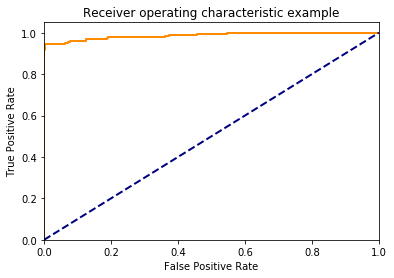

0.9682007338464294



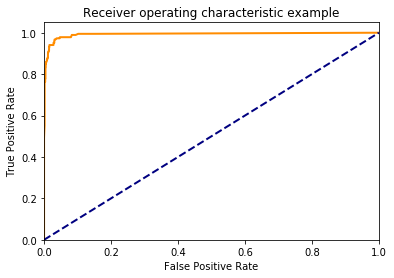

0.9428539466618938



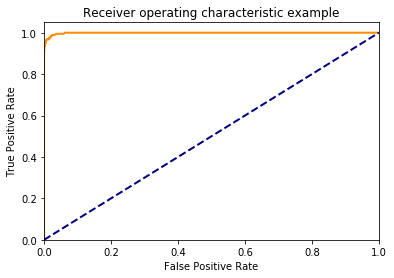

0.9351351351351351



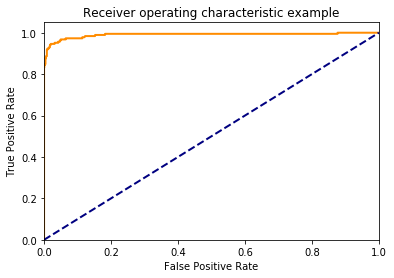

0.9249574906031861



In [17]:
# Your turn here - choose another classifier to see how it compares
# build_roc_auc(ada_mod, training_data, testing_data, y_train, y_test)

# naive_bayes.fit(training_data, y_train)
# bag_mod.fit(training_data, y_train)
# rf_mod.fit(training_data, y_train)
# ada_mod.fit(training_data, y_train)
# svm_mod.fit(training_data, y_train)

for i in [naive_bayes, bag_mod, rf_mod, ada_mod]:
    build_roc_auc(i, training_data, testing_data, y_train, y_test)
    print()

# The naive bayes classifier outperforms the random forest in terms of auc

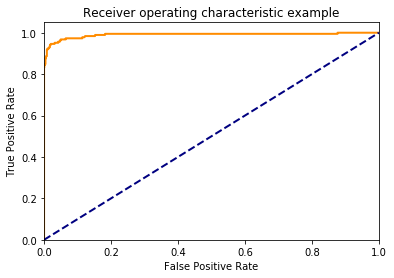

0.9249574906031861


0.9249574906031861

In [16]:
build_roc_auc(ada_mod, training_data, testing_data, y_train, y_test) 

# Regression Metrics
```python
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

classifier = LinearRegression()
classifier.fit(X,y)

guesses = classifier.predict(X)

mae = mean_absolute_error(y, guesses)
mse = mean_squared_error(y, guesses
```

# R2 Score

<img src='R2Score.png'>

```python
from sklearn.metrics import r2_score

y_true = [1, 2, 4]
y_pred = [1.3, 2.5, 3.7]

r2_score(y_true, y_pred)
```

# Implementing Regression Metrics with SKLearn

### Boston Housing Data

In order to gain a better understanding of the metrics used in regression settings, we will be looking at the Boston Housing dataset.  

First use the cell below to read in the dataset and set up the training and testing data that will be used for the rest of this problem.

In [19]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
# import tests2 as t

boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42)

> **Step 1:** Before we get too far, let's do a quick check of the models that you can use in this situation given that you are working on a regression problem.  Use the dictionary and corresponding letters below to provide all the possible models you might choose to use.

In [20]:
# When can you use the model - use each option as many times as necessary
a = 'regression'
b = 'classification'
c = 'both regression and classification'

models = {
    'decision trees': c,
    'random forest': c,
    'adaptive boosting': c,
    'logistic regression': b,
    'linear regression': a
}

#checks your answer, no need to change this code
# t.q1_check(models)

> **Step 2:** Now for each of the models you found in the previous question that can be used for regression problems, import them using sklearn.

In [21]:
# Import models from sklearn - notice you will want to use 
# the regressor version (not classifier) - googling to find 
# each of these is what we all do!
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor

> **Step 3:** Now that you have imported the 4* (5) models that can be used for regression problems, instantate each below.

In [22]:
# Instantiate each of the models you imported
# For now use the defaults for all the hyperparameters
model_rf = RandomForestRegressor()
model_ada = AdaBoostRegressor()
model_linr = LinearRegression()
model_lonr = LogisticRegression()
model_dt = DecisionTreeRegressor()

model_list = [model_ada, model_dt, model_linr, model_rf]

> **Step 4:** Fit each of your instantiated models on the training data.

In [23]:
# Fit each of your models using the training data
model_rf.fit(X_train, y_train)
model_ada.fit(X_train, y_train)
model_linr.fit(X_train, y_train)
#model_lonr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

fitted_model_list = []
for i in model_list:
    fitted_model_list.append(i.fit(X_train, y_train))

/Users/daiglechris/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


> **Step 5:** Use each of your models to predict on the test data.

In [24]:
# Predict on the test values for each model
pred_model_list = []
for i in model_list:
    pred_model_list.append(i.predict(X_test))

> **Step 6:** Now for the information related to this lesson.  Use the dictionary to match the metrics that are used for regression and those that are for classification.

In [25]:
# potential model options
a = 'regression'
b = 'classification'
c = 'both regression and classification'

#
metrics = {
    'precision': b,
    'recall': b,
    'accuracy': b,
    'r2_score': a,
    'mean_squared_error': a,
    'area_under_curve': b, 
    'mean_absolute_area': a
}

#checks your answer, no need to change this code
# t.q6_check(metrics)

> **Step 6:** Now that you have identified the metrics that can be used in for regression problems, use sklearn to import them.

In [26]:
# Import the metrics from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

> **Step 7:** Similar to what you did with classification models, let's make sure you are comfortable with how exactly each of these metrics is being calculated.  We can then match the value to what sklearn provides.

In [27]:
def r2(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the r-squared score as a float
    '''
    sse = np.sum((actual-preds)**2)
    sst = np.sum((actual-np.mean(actual))**2)
    return 1 - sse/sst

# Check solution matches sklearn
# print(r2(y_test, preds_tree))
# print(r2_score(y_test, preds_tree))
# print("Since the above match, we can see that we have correctly calculated the r2 value.")

for i in pred_model_list:
    print(r2(y_test, i))
    print(r2_score(y_test, i))
    print("Since the above match, we can see that we have correctly calculated the r2 value.")
    print()

0.8029512166485153
0.8029512166485153
Since the above match, we can see that we have correctly calculated the r2 value.

0.7547227612164045
0.7547227612164045
Since the above match, we can see that we have correctly calculated the r2 value.

0.7261570836552478
0.7261570836552478
Since the above match, we can see that we have correctly calculated the r2 value.

0.8641934421597459
0.8641934421597459
Since the above match, we can see that we have correctly calculated the r2 value.



> **Step 8:** Your turn fill in the function below and see if your result matches the built in for mean_squared_error.

In [28]:
def mse(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the mean squared error as a float
    '''
    
    return np.sum((actual-preds)**2 / len(actual))


# # Check your solution matches sklearn
# print(mse(y_test, preds_tree))
# print(mean_squared_error(y_test, preds_tree))
# print("If the above match, you are all set!")

for i in pred_model_list:
    print(mse(y_test, i))
    print(mean_squared_error(y_test, i))
    print("Since the above match, we can see that we have correctly calculated the mse value.")
    print()

14.912358000651658
14.912358000651658
Since the above match, we can see that we have correctly calculated the mse value.

18.56221556886228
18.56221556886228
Since the above match, we can see that we have correctly calculated the mse value.

20.72402343733974
20.72402343733974
Since the above match, we can see that we have correctly calculated the mse value.

10.277637724550896
10.277637724550898
Since the above match, we can see that we have correctly calculated the mse value.



> **Step 9:** Now one last time - complete the function related to mean absolute error.  Then check your function against the sklearn metric to assure they match.

In [29]:
def mae(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the mean absolute error as a float
    '''
    
    return np.sum(np.abs(actual-preds) / len(actual))

# # Check your solution matches sklearn
# print(mae(y_test, preds_tree))
# print(mean_absolute_error(y_test, preds_tree))
# print("If the above match, you are all set!")

for i in pred_model_list:
    print(mae(y_test, i))
    print(mean_absolute_error(y_test, i))
    print("Since the above match, we can see that we have correctly calculated the mae value.")
    print()

2.7045057931020153
2.7045057931020153
Since the above match, we can see that we have correctly calculated the mae value.

2.979041916167665
2.9790419161676644
Since the above match, we can see that we have correctly calculated the mae value.

3.1482557548168213
3.1482557548168217
Since the above match, we can see that we have correctly calculated the mae value.

2.3266467065868257
2.326646706586826
Since the above match, we can see that we have correctly calculated the mae value.



> **Step 10:** Which model performed the best in terms of each of the metrics?  Note that r2 and mse will always match, but the mae may give a different best model.  Use the dictionary and space below to match the best model via each metric.

In [30]:
#match each metric to the model that performed best on it
a = 'decision tree'
b = 'random forest'
c = 'adaptive boosting'
d = 'linear regression'


best_fit = {
    'mse': b,
    'r2': b,
    'mae': b
}

# Tests your answer - don't change this code
# t.check_ten(best_fit)

# Recap

In this lesson, you got a glimpse at the ways that we can measure how well our models are performing.

### Training & Testing Data

First, it is important to **always** split your data into training and testing. Then you will measure how well your model performs on the test set of data after being fit training data.

### Classification Measures

If you are fitting your model to predict categorical data (spam not spam), there are different measures to understand how well your model is performing than if you are predicting numeric values (the price of a home).

As we look at classification metrics, note that the wikipedia page (https://en.wikipedia.org/wiki/Precision_and_recall) on this topic is wonderful, but also a bit daunting. I frequently use it to remember which metric does what.

Specifically, you saw how to calculate:
> Accuracy

Accuracy is often used to compare models, as it tells us the proportion of observations we correctly labeled.
<img src='AccuracyRecap.png'>

Often accuracy is not the only metric you should be optimizing on. This is especially the case when you have class imbalance in your data. Optimizing on only accuracy can be misleading in how well your model is truly performing. With that in mind, you saw some additional metrics.

> Precision

Precision focuses on the **predicted** "positive" values in your dataset. By optimizing based on precision values, you are determining if you are doing a good job of predicting the positive values, as compared to predicting negative values as positive.
<img src='PrecisionRecap.png'>

> Recall

Recall focuses on the **actual** "positive" values in your dataset. By optimizing based on recall values, you are determining if you are doing a good job of predicting the positive values **without** regard of how you are doing on the **actual** negative values. If you want to perform something similar to recall on the **actual** 'negative' values, this is called ```specificity```.
<img src='RecallRecap.png'>

> F-Beta Score

In order to look at a combination of metrics at the same time, there are some common techniques like the F-Beta Score (where the F1 score is frequently used), as well as the ROC and AUC. You can see that the \betaβ parameter controls the degree to which precision is weighed into the F score, which allows precision and recall to be considered simultaneously. The most common value for beta is 1, as this is where you are finding the harmonic average between precision and recall.
<img src='FBetaScore.png'>

> ROC Curve & AUC

By finding different thresholds for our classification metrics, we can measure the area under the curve (where the curve is known as a ROC curve). Similar to each of the other metrics above, when the AUC is higher (closer to 1), this suggests that our model performance is better than when our metric is close to 0.
<img src='ROCRecap.png'>

You may end up choosing to optimize on any of these measures. The instructor commonly ends up using AUC or an F1 score in practice. However, there are always reason to choose one measure over another depending on your situation.

> Regression Measures

You want to measure how well your algorithms are performing on predicting numeric values? In these cases, there are three main metrics that are frequently used
<ul>
    <li>mean absolute error</li>
    <li>mean squared error</li>
    <li>r2 values</li>
    </ul>

As an important note, optimizing on the mean absolute error may lead to a different 'best model' than if you optimize on the mean squared error. However, optimizing on the mean squared error will **always** lead to the same 'best' model as if you were to optimize on the **r2** value.

Again, if you choose a model with the best r2 value (the highest), it will also be the model that has the lowest (MSE). Choosing one versus another is based on which one you feel most comfortable explaining to someone else.

> Mean Absolute Error (MAE)

The first metric you saw was the mean absolute error. This is a useful metric to optimize on when the value you are trying to predict follows a skewed distribution. Optimizing on an absolute value is particularly helpful in these cases because outliers will not influence models attempting to optimize on this metric as much as if you use the mean squared error. The optimal value for this technique is the median value. When you optimize for the R2 value of the mean squared error, the optimal value is actually the mean.

<img src='MAE.png'>

> Mean-Squared Error (MSE)

The mean squared error is by far the most used metric for optimization in regression problems. Similar to with MAE, you want to find a model that minimizes this value. This metric can be greatly impacted by skewed distributions and outliers. When a model is considered optimal via MAE, but not for MSE, it is useful to keep this in mind. In many cases, it is easier to actually optimize on MSE, as the a quadratic term is differentiable. However, an absolute value is not differentiable. This factor makes this metric better for gradient based optimization algorithms.
<img src='MSE.png'>

> R2 Score

Finally, the r2 value is another common metric when looking at regression values. Optimizing a model to have the lowest MSE will also optimize a model to have the the highest R2 value. This is a convenient feature of this metric. The R2 value is frequently interpreted as the 'amount of variability' captured by a model. Therefore, you can think of MSE, as the average amount you miss by across all the points, and the R2 value as the amount of the variability in the points that you capture with a model.
<img src='R2Score.png'>